Epoch:1 cost:2.554173470 W: 0.0239771 b: 0.0557753
Epoch:51 cost:0.103684157 W: 0.341068 b: 0.143406
Epoch:101 cost:0.100595787 W: 0.335628 b: 0.182544
Epoch:151 cost:0.097864270 W: 0.330511 b: 0.219355
Epoch:201 cost:0.095448464 W: 0.325698 b: 0.253976
Epoch:251 cost:0.093311891 W: 0.321172 b: 0.286537
Epoch:301 cost:0.091422237 W: 0.316915 b: 0.317163
Epoch:351 cost:0.089751042 W: 0.312911 b: 0.345967
Epoch:401 cost:0.088273041 W: 0.309145 b: 0.373058
Epoch:451 cost:0.086965941 W: 0.305603 b: 0.398538
Epoch:501 cost:0.085810006 W: 0.302272 b: 0.422502
Epoch:551 cost:0.084787764 W: 0.299139 b: 0.445041
Epoch:601 cost:0.083883747 W: 0.296192 b: 0.46624
Epoch:651 cost:0.083084285 W: 0.293421 b: 0.486178
Epoch:701 cost:0.082377389 W: 0.290814 b: 0.504929
Epoch:751 cost:0.081752270 W: 0.288363 b: 0.522565
Epoch:801 cost:0.081199504 W: 0.286057 b: 0.539152
Epoch:851 cost:0.080710709 W: 0.283888 b: 0.554754
Epoch:901 cost:0.080278508 W: 0.281849 b: 0.569427
Epoch:951 cost:0.079896346 W: 0.2

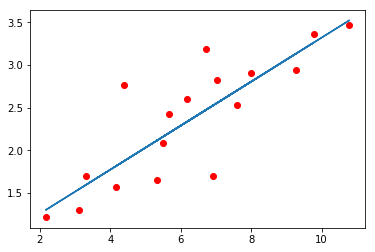

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.01
training_epochs = 2000
display_step = 50


#Training Data
train_X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
activation = W * X + b
# activation = tf.add(tf.multiply(X,W), b)

cost = tf.reduce_sum(tf.square(activation-Y)) / (2 * n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(training_epochs):
        for (x,y) in zip(train_X,train_y):
            sess.run(optimizer, feed_dict={X:x,Y:y})

        if epoch % display_step == 0:
            print('Epoch:%d' % (epoch+1),'cost:{:.9f}'.format(sess.run(cost,feed_dict={X:train_X,Y:train_y})),\
                  'W:',sess.run(W),'b:',sess.run(b))

    print("Optimization Finished!")
    print('Epoch:%d' % (epoch + 1), 'cost:{:.9f}'.format(sess.run(cost, feed_dict={X: train_X, Y: train_y})), \
          'W:', sess.run(W), 'b:', sess.run(b))

    plt.scatter(train_X, train_y,c='r',marker='o')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b))
    plt.show()